In [37]:
import pandas as pd

df = pd.read_excel("sugar.xlsx")
sugar = df.copy()

In [49]:
# Finding if 0 values exist
sugar1 = sugar[sugar['Glucose'] == 0]
sugar1 += sugar[sugar['Pregnancies'] == 0]
sugar1 += sugar[sugar['BloodPressure'] == 0]
sugar1 += sugar[sugar['Insulin'] == 0]
sugar1 += sugar[sugar['BMI'] == 0]
sugar1 += sugar[sugar['DiabetesPedigreeFunction'] == 0]
sugar1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome(Text)


In [50]:
# Removing those 0 values
sugar = sugar[sugar['Glucose'] != 0]
sugar = sugar[sugar['Pregnancies'] != 0]
sugar = sugar[sugar['BloodPressure'] != 0]
sugar = sugar[sugar['Insulin'] != 0]
sugar = sugar[sugar['BMI'] != 0]
sugar = sugar[sugar['DiabetesPedigreeFunction'] != 0]
sugar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome(Text)
0,1,89,66,23,94,28.1,0.167,21,0,Non-diabetic
2,3,78,50,32,88,31.0,0.248,26,1,Diabetic
3,2,197,70,45,543,30.5,0.158,53,1,Diabetic
4,1,189,60,23,846,30.1,0.398,59,1,Diabetic
5,5,166,72,19,175,25.8,0.587,51,1,Diabetic
...,...,...,...,...,...,...,...,...,...,...
387,1,121,78,39,74,39.0,0.261,28,0,Non-diabetic
389,1,128,88,39,110,36.5,1.057,37,1,Diabetic
390,2,88,58,26,16,28.4,0.766,22,0,Non-diabetic
391,10,101,76,48,180,32.9,0.171,63,0,Non-diabetic


In [51]:
X = sugar.iloc[:, [1,2,4,5,6,7]]
X

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,89,66,94,28.1,0.167,21
2,78,50,88,31.0,0.248,26
3,197,70,543,30.5,0.158,53
4,189,60,846,30.1,0.398,59
5,166,72,175,25.8,0.587,51
...,...,...,...,...,...,...
387,121,78,74,39.0,0.261,28
389,128,88,110,36.5,1.057,37
390,88,58,16,28.4,0.766,22
391,101,76,180,32.9,0.171,63


In [52]:
y = sugar.iloc[:, [9]]
y

,Outcome(Text)
0,Non-diabetic
2,Diabetic
3,Diabetic
4,Diabetic
5,Diabetic
...,...
387,Non-diabetic
389,Diabetic
390,Non-diabetic
391,Non-diabetic


In [53]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=11)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Test the classifier on the testing data
accuracy = knn.score(X_test, y_test)

print("Accuracy: {:.2f} %".format(accuracy *100))

Accuracy: 85.29 %


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Here, X_train and y_train are the features and labels for the training data, and X_test and y_test are the features(dependent variables) and labels(Outcome / Classes) for the testing data. 

The fit method trains the classifier on the training data, and the score method tests the classifier on the testing data and returns the accuracy.

You can adjust the number of neighbors used in the classifier by setting the n_neighbors parameter. You can also use other distance metrics for the classifier by setting the metric parameter.

In [55]:
# Make predictions on new data
new_data = [[100, 70, 80, 26.0, 0.5, 21]]
prediction = knn.predict(new_data)

print("Prediction: {}".format(prediction))

Prediction: ['Non-diabetic']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


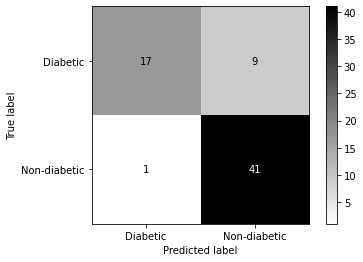

In [56]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
plot_confusion_matrix(knn, X_test, y_test, cmap='binary')
plt.show()